# Data Cleaning Walkthrough - Efficacy of Standardized Tests in the US Educational System (Part 1)

## Objective

Explore and clean multiple data files.

<p>-- Handle files with different formats and columns <br]>
<p>-- Prepare to merge multiple files<br]>
<p>-- Use text processing to extract coordinates from a string<br]>
<p>-- Convert columns from strings to numbers<br]>


## Data Set

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2).

With this data set, allow us to investigating the correlations between SAT scores and demographics(race, gender, income, and more) that might be an interesting angle to take.

| File Name    | Available Formats | Description                                                                |
|--------------|-------------------|----------------------------------------------------------------------------|
| sat_results  | .csv (28 kb)      | SAT scores for each high school in New York City                           |
| class_size   | .csv (2,433 kb)   | Information on class size for each school                                  |
| ap_2010      | .csv (12 kb)      | Advanced Placement (AP) exam results for each high school                  |
| graduation   | .csv (3,252 kb)   | The percentage of students who graduated, and other outcome information    |
| demographics | .csv (1,542 kb)   | Demographic information for each school                                    |
| hs_directory | .csv (1, 275 kb)  | A Directory of high schools                                                |
| survey_all   | .txt (8,234 kb)   | Surveys of parents, teachers, and students from all schools                |
| survey_d75   | .txt (286 kb)     | Surveys of parents, teachers, and students from New York City disctrict 75 |

All of these data sets are interrelated. It's need to combine them into a single data set before find correlations.

** SPECIAL NOTES: **
<p>•	Only high school students take the SAT, (focus on high schools).<br\>
<p>•	New York City is made up of five boroughs, which are essentially distinct regions.<br\>
<p>•	New York City schools fall within several different school districts, each of which can contains dozens of schools.<br\>
<p>•	Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.<br\>
<p>•	Each school in New York City has a unique code called a DBN, or district borough number.<br\>
<p>•	Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.<br\>


 ## Reading In the Data

In [1]:
import pandas as pd
data_files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "sat_results.csv"]
data = {}
for each in data_files:
    f = pd.read_csv("C:/Users/i7/csv/schools/{0}".format(each))
    key_name = each.replace(".csv","")
    data[key_name] = f

#### Exploring the SAT Data

In [2]:
print(data["sat_results"].head())
print(data["sat_results"].shape)
print(data["sat_results"].dtypes)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

** Observations based on this output :**
<p>•	The DBN appears to be a unique ID for each school.<br\>
<p>•	The first few rows of names that we only have data about high schools.<br\>
<p>•	There's only a single row for each high school, so each DBN is unique in the SAT data.<br\>
<p>•	Combine the three columns that contain SAT scores -- SAT Critical Reading Avg., Score SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.<br\>

#### Exploring the Remaining Data

In [3]:
for f in data:
    print(data[f].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

** Observations based on this output :**
<p>• Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a DBN column to combine the data sets<br\>
<p>• Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.<br\>
<p>• Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. <br\>

 ## Reading In the Survey Data

In [4]:
all_survey = pd.read_csv("C:/Users/i7/csv/schools/survey_all.txt", delimiter = "\t", encoding = "windows-1252")
d75_survey = pd.read_csv("C:/Users/i7/csv/schools/survey_d75.txt", delimiter = "\t", encoding = "windows-1252")

Combine the survey data into a single dataframe

In [5]:
survey = pd.concat([all_survey, d75_survey], axis=0)
print(survey.head(5))

     N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11   ...    t_q8c_1  t_q8c_2  t_q8c_3 t_q8c_4  t_q9  \
0       7.6       NaN   ...       29.0     67.0      5.0     0.0   NaN   
1       7.6       NaN   ...       74.0     21.0      6.0     0.0   NaN   
2       8.3       NaN   ...       33.0     35.0     20.0    13.0   NaN   
3       8.2       5.9   ...       21.0     45.0     28.0     7.0   NaN   
4       7.9       NaN   ...       59.0     36.0      5.0     0.0   NaN   

   t_q9_1  t_q9_2  t_q9_3  t_q9_4  t_q9_5  
0     5.0    14.0    52.0    24.0     5.0  
1     3.0     6.0     3.0   

** Observations based on this output :**
<p>• There are over 2000 columns (nearly all of which don't needed)<br\>
<p>• The survey data has a dbn column that have to convert to uppercase (DBN). <br\>

#### Filter the columns to remove the ones that don't need

Use [data dictionary file](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) to determine which columns to use

In [6]:
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

survey = survey.loc[:,survey_fields]
data["survey"] = survey

print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

      ...      eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0     ...           7.6       7.9       NaN       NaN       NaN       NaN   
1     ...           8.9       9.1       NaN       NaN       NaN       NaN   
2     ...           6.8       7.5       NaN       NaN       NaN       NaN   
3     ...           6.8       7.8       6.2       5.9       6.5       7.4   
4     ...           7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11 

## Inserting DBN Fields

Notice that :


When exploring all of the data sets, class_size and hs_directory data don't have a 'DBN' column


(hs_directory does have a 'dbn' column)

DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data. 

#### Inserting DBN Fields into class_size data

In [7]:
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return string_representation.zfill(2)

data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
print(data["class_size"].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


#### Inserting DBN Fields into hs_directory data

In [8]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

## Combining the SAT Scores

In [9]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for each in cols:
    data["sat_results"][each] = pd.to_numeric(data["sat_results"][each], errors="coerce")
    
data["sat_results"]["sat_score"] = data["sat_results"][cols[0]] + data["sat_results"][cols[1]] + data["sat_results"][cols[2]]
print(data["sat_results"]["sat_score"].head())

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


## Parsing Geographic Coordinates for Schools

In [10]:
pd.set_option('display.max_colwidth', -1)
print(data["hs_directory"]["Location 1"].head())

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)    
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)          
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.842414068000494, -73.91616158599965)      
3    411 Pearl Street\nNew York, NY 10038\n(40.71067947100045, -74.00080702099967)      
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40.718810094000446, -73.80650045499965)
Name: Location 1, dtype: object


In [11]:
import re
def find_lat(loc):
    coords = re.findall("\(.+,.+\)", loc)
    lat = coords[0].split(",")[0].replace("(","")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

print(data["hs_directory"].head())

      dbn                                         school_name       boro  \
0  17K548  Brooklyn School for Music & Theatre                 Brooklyn    
1  09X543  High School for Violin and Dance                    Bronx       
2  09X327  Comprehensive Model School Project M.S. 327         Bronx       
3  02M280  Manhattan Early College School for Advertising      Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary School  Queens      

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0  K440          718-230-6250    718-230-6262  9              12               
1  X400          718-842-0687    718-589-9849  9              12               
2  X240          718-294-8111    718-294-8109  6              12               
3  M520          718-935-3477    NaN           9              10               
4  Q695          718-969-3155    718-969-3552  6              12               

  expgrade_span_min  expgrade_span_max    ...      \
0  NaN   

# Data Cleaning Walkthrough - Efficacy of Standardized Tests in the US Educational System (Part 2)

## Objective

Combine multiple data sets to get a single, clean data set.

<p>-- Handle missing values<br]>
<p>-- Different types of merges<br]>
<p>-- Condensing data sets<br]>
<p>-- Compute averages across dataframes<br]>

## Condensing the Class Size Data Set

While the main data set that want to analyze, sat_results, has unique DBN values for every high school in New York City, other data sets aren't as clean. A single row in the sat_results data set may match multiple columns in the class_size data set, for example. This situation will create problems, because we don't know which of the multiple entries in the class_size data set we should combine with the single matching entry in sat_results. 

In [12]:
from IPython.display import display
display(data["class_size"].head())

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.


If we look at the unique values for PROGRAM TYPE, we get the following:
array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)


Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

In [13]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
display(class_size.head())

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


** Observations based on this output :**
<p>• DBN still isn't completely unique, due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns.<br\>

## Computing Average Class Sizes

Take the average across all of the classes a school offers. This will give us unique DBN values, while also incorporating as much data as possible into the average.

In [14]:
import numpy as np
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
display(data["class_size"].head())

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


## Condensing the Demographics Data Set

In [15]:
display(data["demographics"].head())

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


** Observations based on this output :**
<p>• DBN still isn't completely unique, due to the schoolyear columns.<br\>

We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

In [16]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
display(data["demographics"].head())

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


## Condensing the Graduation Data Set

In [17]:
display(data["graduation"].head())

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


** Observations based on this output :**
<p>• DBN still isn't completely unique, due to the Demographic and Cohort columns.<br\>

We want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

In [18]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
display(data["graduation"].head())

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


## Converting AP Test Scores

In [19]:
display(data["ap_2010"].head())

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [20]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
   
display(data["ap_2010"].head())

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


## Merging the Dataframe

In [21]:
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")
display(combined.head(5))
print(combined.shape)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


(479, 33)


In [22]:
combined = combined.merge(data["class_size"], on="DBN", how="inner")
display(combined.head(5))
print(combined.shape)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,20.5%,11,14.1%,1,88.000000,4.000000,22.564286,18.50,26.571429,NaN
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,37.1%,20,16.100000000000001%,1,105.687500,4.750000,22.231250,18.25,27.062500,NaN
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,16.7%,5,5.6%,1,57.600000,2.733333,21.200000,19.40,22.866667,NaN
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1,28.600000,1.200000,23.000000,22.60,23.400000,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,29.8%,5,6%,1,69.642857,3.000000,23.571429,20.00,27.357143,NaN


(435, 40)


In [23]:
combined = combined.merge(data["demographics"], on="DBN", how="inner")
display(combined.head(5))
print(combined.shape)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,123,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,89,22.6,181,45.9,9,2.3,226.0,57.4,168.0,42.6
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,143,23.9,331,55.4,62,10.4,327.0,54.7,271.0,45.3
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,77,34.4,133,59.4,8,3.6,97.0,43.3,127.0,56.7
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,116,31.6,209,56.9,6,1.6,170.0,46.3,197.0,53.7


(435, 77)


In [24]:
combined = combined.merge(data["hs_directory"], on="DBN", how="inner")
display(combined.head(5))
print(combined.shape)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.71376394700047, -73.98526003999967)",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.7123318510005, -73.98479662499966)",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.729782687000466, -73.98304144099967)",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.720569079000484, -73.98567269099965)",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.718725451000466, -73.97942638599966)",40.718725,-73.979426


(363, 137)


In [25]:
combined = combined.merge(data["survey"], on="DBN", how="inner")
display(combined.head(5))
print(combined.shape)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,6.6,7.3,6.0,5.7,6.3,7.0,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,8.0,8.8,NaN,NaN,NaN,NaN,7.9,7.9,7.9,8.4
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,6.1,6.8,6.4,5.9,6.4,7.0,6.9,6.2,6.6,7.0
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,5.9,7.3,7.3,6.4,7.0,7.7,7.8,6.7,6.9,7.8


(363, 159)


## Filling In Missing Values

Fill in the missing values with the overall mean for the column

In [26]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

display(combined.head(5))
print(combined.shape)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,6.1,6.5,6.000000,5.600000,6.100000,6.700000,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,6.6,7.3,6.000000,5.700000,6.300000,7.000000,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,8.0,8.8,6.611667,6.094722,6.620278,7.381389,7.9,7.9,7.9,8.4
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,6.1,6.8,6.400000,5.900000,6.400000,7.000000,6.9,6.2,6.6,7.0
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,5.9,7.3,7.300000,6.400000,7.000000,7.700000,7.8,6.7,6.9,7.8


(363, 159)


## Adding A School District Column For Mapping

In [27]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
print(combined["school_dist"].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


# Data Cleaning Walkthrough - Efficacy of Standardized Tests in the US Educational System (Part 3)

## Objective

Analyze and visualize real-world data.

Discovering correlations, create plots, and then make maps.

<p>-- Create school and district-level maps<br]>
<p>-- Finding correlations and what those correlation mean<br]>
<p>-- Plotting data out, rather than relying on the r value alone<br]>
<p>-- ell_percent has a strong negative correlation with sat_score<br]>

## Finding Correlations With The R Value

Find correlations between SAT_score and other columns in a dataframe.

In [28]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO         NaN      
schoolyear                             NaN      
fl_percent                             NaN      
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

** Observations based on this output :**
<p>• total_enrollment has a strong positive correlation with sat_score. <br\>
<p>  -- This is surprising because we'd expect smaller schools where students receive more attention to have higher scores.<br\>
<p>  -- Other columns that are proxies for enrollment correlate similarly. These include total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS. <br\>


•	Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.


•	Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.


•	Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).


•	There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).


•	The percentage of English language learners at the school (ell_percent, frl_percent) has a strong negative correlation with SAT scores.

### Plotting Enrollment with Sat_score

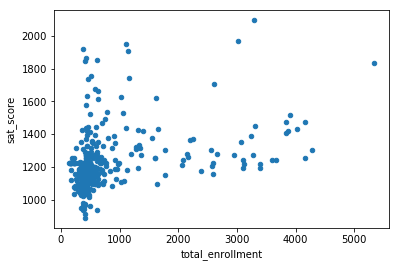

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

** Observations based on this output :**
<p>• Based on the plot that just created, it doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment<br\>

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. 
(this cluster may be what's making the r value so high)



In [30]:
## extracting the names of the schools in this cluster 
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

91     INTERNATIONAL COMMUNITY HIGH SCHOOL  
125    0                                    
126    BRONX INTERNATIONAL HIGH SCHOOL      
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176    0                                    
179    HIGH SCHOOL OF WORLD CULTURES        
188    BROOKLYN INTERNATIONAL HIGH SCHOOL   
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237    IT TAKES A VILLAGE ACADEMY           
253    MULTICULTURAL HIGH SCHOOL            
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


It appears that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners (International High School). This indicates that it's actually ell_percent that correlates strongly with sat_score, rather than total_enrollment.

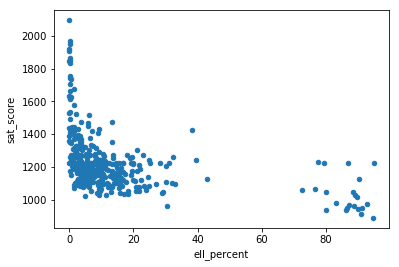

In [31]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()                     

It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. 

## Mapping The Schools With Basemap

Mapping out ell_percent by school district. The map will show which areas of the city have a lot of English language learners.

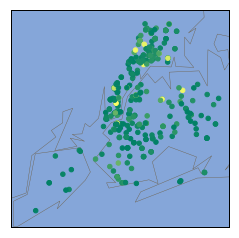

In [32]:
from mpl_toolkits.basemap import Basemap

## map of New York city
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")
plt.show()

It appears that school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.


It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but it can't be sure.(One way to make very granular statistics easier to read is to aggregate them.)

## Calculating District-Level Statistics

In [33]:
import numpy as np
districts = combined.groupby("school_dist").agg(np.mean)
districts.reset_index(inplace=True)
print(districts.head())

  school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0  01          441.833333                       473.333333            
1  02          426.619092                       444.186256            
2  03          428.529851                       437.997512            
3  04          402.142857                       416.285714            
4  05          427.159915                       438.236674            

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0  439.333333              1354.500000  116.681090       173.019231          
1  424.832836              1295.638184  128.908454       201.516827          
2  426.915672              1293.443035  156.183494       244.522436          
3  405.714286              1224.142857  129.016484       183.879121          
4  419.666098              1285.062687  85.722527        115.725275          

   Number of Exams with scores 3 4 or 5  Total Cohort  CSD     ...      \
0  135.800000                 

#### Plotting out ell_percent by district. 

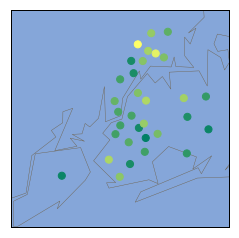

In [34]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

# Perform additional Analysis through Maps and Visualizations

## Plotting survey correlations

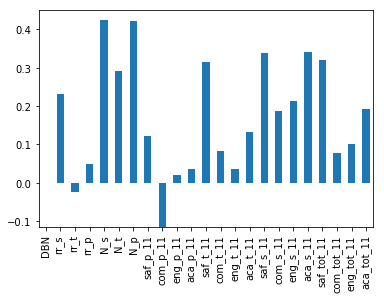

In [35]:
%matplotlib inline
combined.corr()["sat_score"][survey_fields].plot.bar()

There are high correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.


It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.



How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.


The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

## Exploring safety

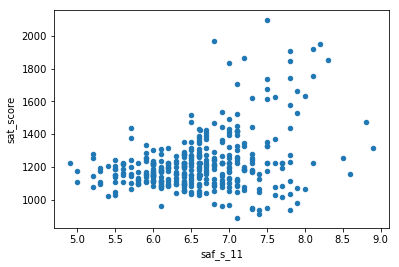

In [36]:
combined.plot.scatter("saf_s_11", "sat_score")

There appears to be a correlation between SAT scores and safety, although it isn't that strong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

## Plotting safety

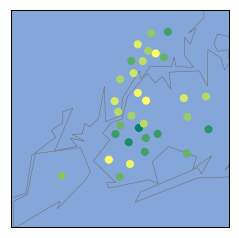

In [38]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

It looks like Upper Manhattan and parts of Queens and the Bronx tend to have lower safety scores, whereas Brooklyn has high safety scores.

## Exploring Race And SAT Scores

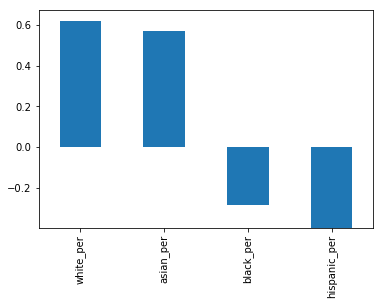

In [39]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar()

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.

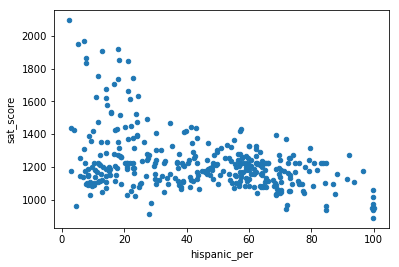

In [40]:
combined.plot.scatter("hispanic_per", "sat_score")

In [41]:
combined[combined["hispanic_per"] > 95]["SCHOOL NAME"]

44     MANHATTAN BRIDGES HIGH SCHOOL                           
82     WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL        
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND MATHEMATICS
125    ACADEMY FOR LANGUAGE AND TECHNOLOGY                     
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS                   
176    PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE        
253    MULTICULTURAL HIGH SCHOOL                               
286    PAN AMERICAN INTERNATIONAL HIGH SCHOOL                  
Name: SCHOOL NAME, dtype: object

The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores

In [42]:
combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"]

37     STUYVESANT HIGH SCHOOL                             
151    BRONX HIGH SCHOOL OF SCIENCE                       
187    BROOKLYN TECHNICAL HIGH SCHOOL                     
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE
356    STATEN ISLAND TECHNICAL HIGH SCHOOL                
Name: SCHOOL NAME, dtype: object

Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

## Exploring Gender And SAT Scores

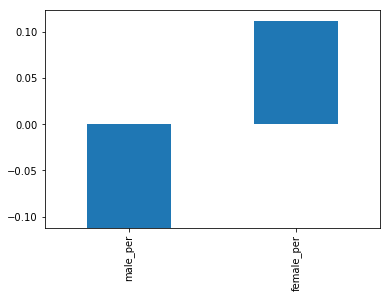

In [43]:
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar()

It appears that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.

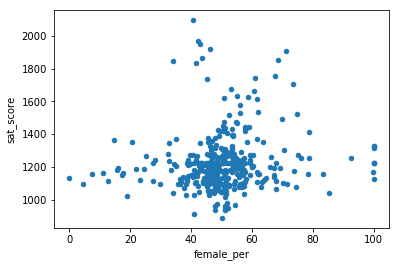

In [44]:
combined.plot.scatter("female_per", "sat_score")

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

In [45]:
combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"]

5      BARD HIGH SCHOOL EARLY COLLEGE                                      
26     ELEANOR ROOSEVELT HIGH SCHOOL                                       
60     BEACON HIGH SCHOOL                                                  
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS
302    TOWNSEND HARRIS HIGH SCHOOL                                         
Name: SCHOOL NAME, dtype: object

These schools appears to be very selective liberal arts schools that have high academic standards.

## Exploring AP Scores Vs. SAT Scores

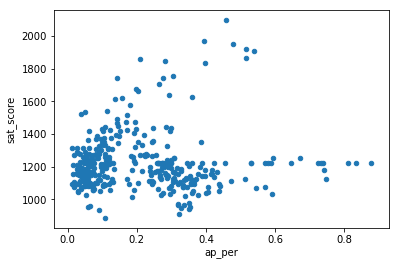

In [46]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score')

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.